In [113]:
import pandas as pd
import numpy as np

df = pd.read_csv('chiefs_data_clean2019.csv')
del[df['game_time']]

In [114]:
df = df[df['attendance'] > 55000]

In [115]:
div_opp = []

for index,row in df.iterrows() :
    if (row['opp_Broncos'] == 1) \
        or (row['opp_Raiders'] == 1) \
            or (row['opp_Chargers'] == 1):
            div_opp.append(1)
    else:
        div_opp.append(0)

In [116]:
# stadium capacity 
capp_79k = []

for x in df['season'] :
    if (x >= 2005) and (x <= 2009) :
        capp_79k.append(1)
    else :
        capp_79k.append(0)

df['cap_79k'] = capp_79k

In [117]:
df['Division_Opp'] = div_opp

pd.DataFrame(df.groupby('Division_Opp')['attendance'].mean()).reset_index()

,Division_Opp,attendance
0,0,73372.904110
1,1,74362.822222


<AxesSubplot:>

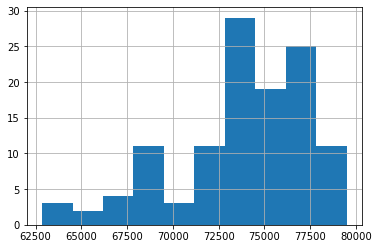

In [118]:
df['attendance'].hist()

In [119]:
df['loss_buck'] = [8 if x > 8 else x for x in df['losses']]

<AxesSubplot:xlabel='losses'>

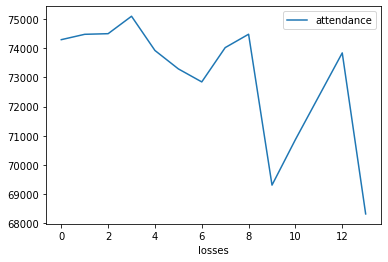

In [120]:
losses = df.groupby('losses')['attendance'].mean().reset_index()
losses.plot('losses','attendance')

<AxesSubplot:xlabel='loss_buck'>

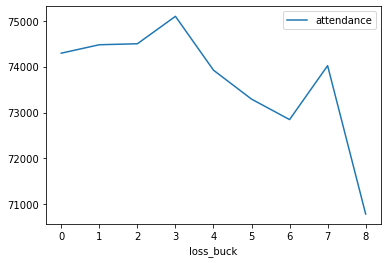

In [121]:
losses = df.groupby('loss_buck')['attendance'].mean().reset_index()
losses.plot('loss_buck','attendance')

<AxesSubplot:xlabel='wins'>

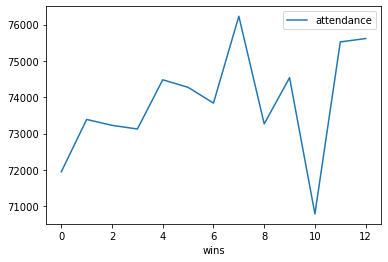

In [122]:
wins = df.groupby('wins')['attendance'].mean().reset_index()
wins.plot('wins','attendance')

<AxesSubplot:xlabel='win_ratio'>

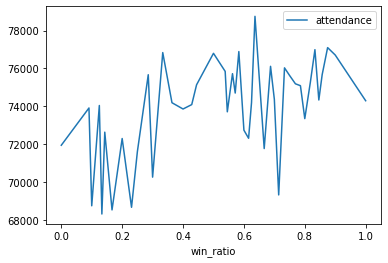

In [123]:
wins = df.groupby('win_ratio')['attendance'].mean().reset_index()
wins.plot('win_ratio','attendance')

<AxesSubplot:xlabel='season'>

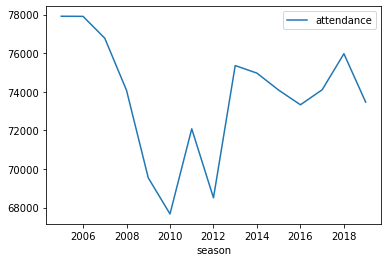

In [124]:
season = df.groupby('season')['attendance'].mean().reset_index()
season.plot('season','attendance')

In [125]:
df[['losses','attendance']].corr()

,losses,attendance
losses,1.000000,-0.302018
attendance,-0.302018,1.000000


In [126]:
new_data = df[['loss_buck','attendance']]

In [130]:
predictors = ['losses','season','exp_pts_off','gametime_1', 'Division_Opp']
'''for x in df.columns :
    if 'opp' in x :
        predictors.append(x)'''

"for x in df.columns :\n    if 'opp' in x :\n        predictors.append(x)"

In [131]:
predictors

['losses', 'season', 'exp_pts_off', 'gametime_1', 'Division_Opp']

In [132]:
target = ['attendance']

In [133]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
df[predictors], df[target], test_size = .2, random_state = 123
)

x_test = pd.DataFrame(x_test, columns = list(df[predictors].columns))
x_train = pd.DataFrame(x_train, columns = list(df[predictors].columns))


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)

lr_fit_predict = lr_fit.predict(x_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_fit_predict))
print("R Squared of Ridge Regression:", r2_score(y_test, lr_fit_predict))
print("RMSE of Linear Regression", str(lr_rmse))


R Squared of Ridge Regression: 0.25658875637381107
RMSE of Linear Regression 2978.9856078429593


## Final Results and Thoughts

Using only Linear Regression and a couple of things I learned from the orginal LassoLars Model, we were able to get RMSE down to under 3,000 and hit R^2 of 25.6%

The linear regression model is also much simpler because it uses far fewer predictors, meaning there is less chance for multicolinearity.

Loving the improved results. I will continue to tinker when time allows. 